In [1]:
!cd ~/Desktop/
#!pwd

/bin/bash: line 0: cd: /home/gabriele.deleonardis/Desktop/: No such file or directory


In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import re

## Plotting parcel volume - by subject

In [32]:
# Load data
vols = pd.read_csv("/home/gabriele.deleonardis/irbio_folder/spreading_dynamics_clinical/concat_vols.tsv", sep='\t')
vols.index.name = 'Parcels'
vols.index += 1

vols = vols.reindex(sorted(vols.columns), axis=1)

In [33]:
vols

sub-10159  sub-10171  sub-10189  sub-10206  sub-10217  sub-10225  \
Parcels                                                                     
1               47         65         62         65         46          0   
2               24         27         34         40         27          0   
3              176        128        135        151        182        179   
4               91         95        100         88        115        109   
5              117        150        152        165        121          0   
...            ...        ...        ...        ...        ...        ...   
450             93        184         90        143        139        174   
451            246        299        207        299        232        291   
452            191        222        144        231        165        220   
453            100        104         71        139         92        171   
454            225        194        135        205        122        330   

         sub-10227  sub-10228  sub-10235  sub-10249  ...  sub-70073  \
Parcels                                              ...              
1               66         61         68         61  ...         74   
2               29         27         38         46  ...         34   
3              141        131        179        163  ...        187   
4               99        111        116        117  ...        121   
5              195        150        147        165  ...        233   
...            ...        ...        ...        ...  ...        ...   
450             99         82        176        189  ...        120   
451            258        259        318        328  ...        298   
452            183        121        166        266  ...        189   
453             79        147        118         80  ...        101   
454            158        172        139        171  ...        127   

         sub-70074  sub-70075  sub-70076  sub-70077  sub-70079  sub-70080  \
Parcels                                                                     
1               80         96         56         53         70         45   
2               39         37         36         21         34         25   
3              197        194        166        151        172        108   
4              128        141        108        113         93         72   
5              221        221        153        141        213        166   
...            ...        ...        ...        ...        ...        ...   
450            122        141         77         87        171         84   
451            276        306        225        278        275        203   
452            264        218        167        162        295        162   
453            103        191         88         76        113         85   
454            159        279        216        132        175        201   

         sub-70081  sub-70083  sub-70086  
Parcels                                   
1               54         80         71  
2               36         41         37  
3              148        138        154  
4               71        103        108  
5              156        163        188  
...            ...        ...        ...  
450             78        130        122  
451            222        242        240  
452            208        177        274  
453             44        136        123  
454             88        179        167  

[454 rows x 202 columns]

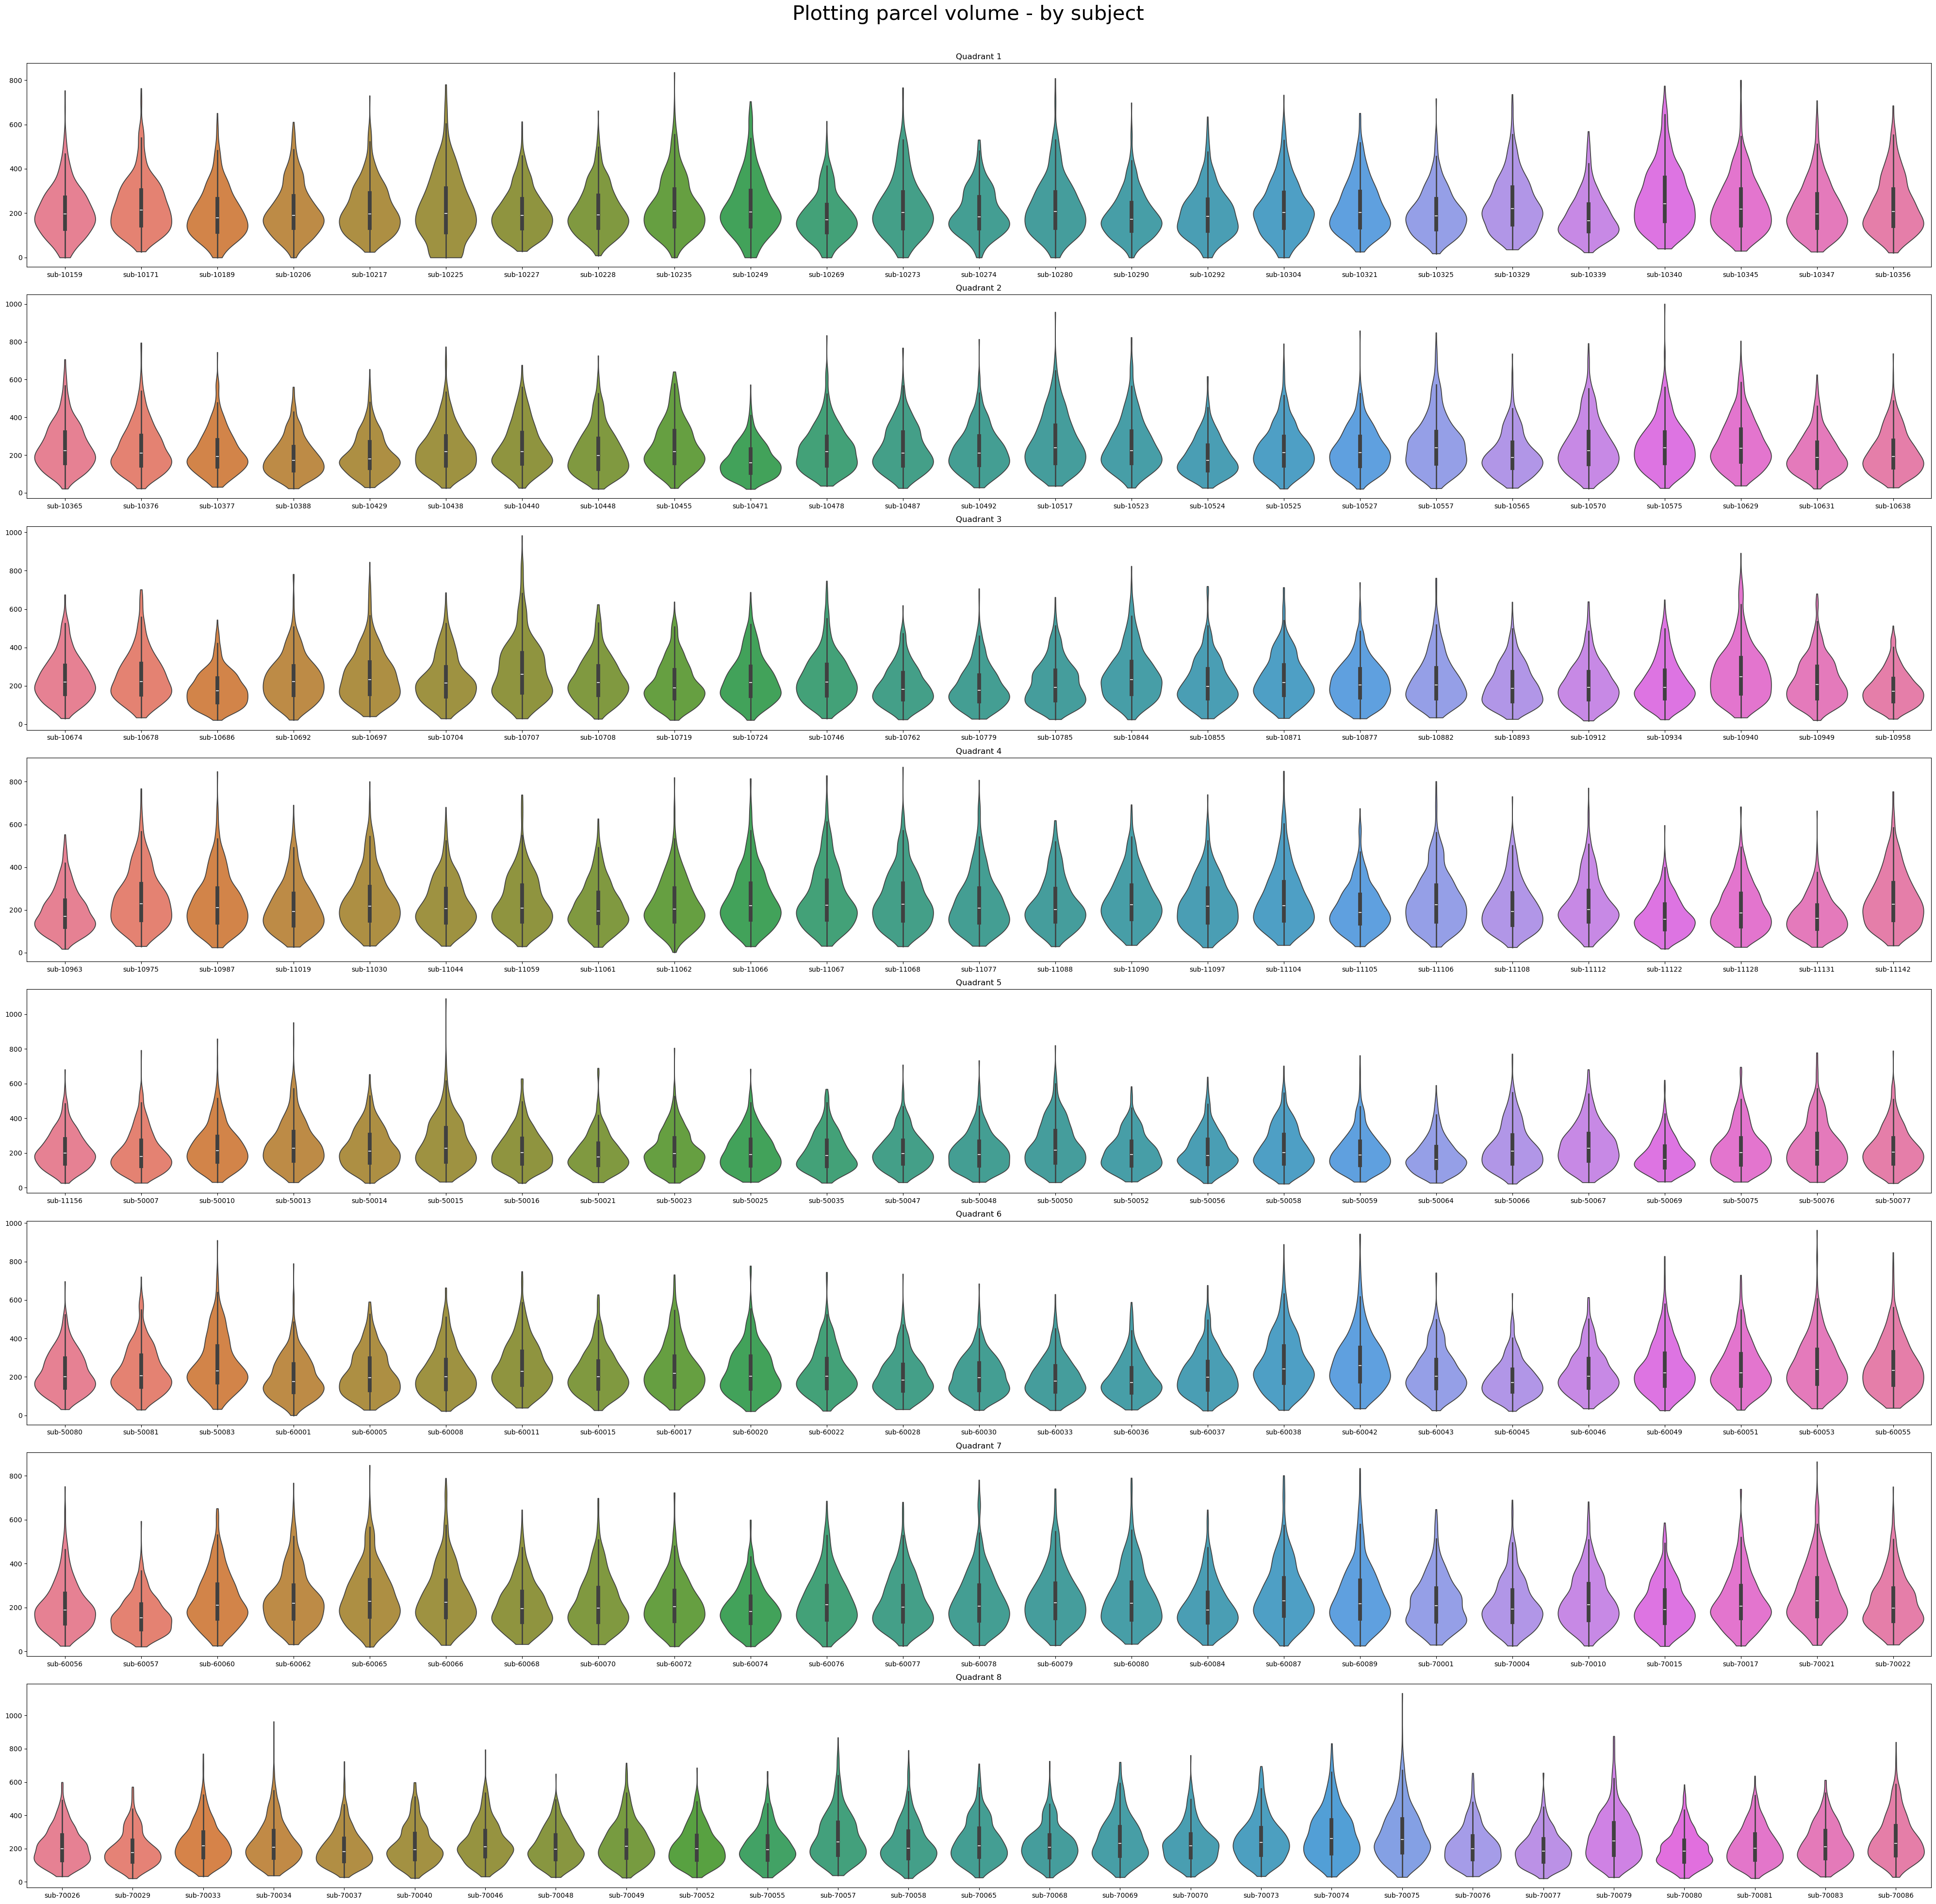

In [31]:
# Determine the number of subjects and calculate the number of subplots needed
num_subjects = len(vols.columns)
num_subplots = 8
subplots_per_quadrant = num_subjects // num_subplots

# Calculate the number of subjects in the last quadrant
subjects_remaining = num_subjects % num_subplots

# Create subplots for each quadrant
fig, axs = plt.subplots(num_subplots, 1, figsize=(40, 40))

# Plot each quadrant
for i in range(num_subplots - 1):
    start_index = i * subplots_per_quadrant
    end_index = (i + 1) * subplots_per_quadrant
    subset_vols = vols.iloc[:, start_index:end_index]
    ax = sns.violinplot(data=subset_vols, ax=axs[i], cut=0)  # Set cut=0 to align with y=0
    ax.set_title(f'Quadrant {i+1}')

# Plot the remaining subjects in the last subplot
start_index = (num_subplots - 1) * subplots_per_quadrant
subset_vols = vols.iloc[:, start_index:num_subjects]
ax = sns.violinplot(data=subset_vols, ax=axs[num_subplots - 1], cut=0)  # Set cut=0 to align with y=0
ax.set_title(f'Quadrant {num_subplots}')
fig.suptitle("Plotting parcel volume - by subject", size=30)

fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

## Get Subjects with 0 entries

In [35]:
# Read the TSV file into a DataFrame
df = pd.read_csv("/home/gabriele.deleonardis/irbio_folder/spreading_dynamics_clinical/concat_vols.tsv", sep='\t', index_col=0)

# Transpose the DataFrame to have subjects as rows and parcels as columns
df_transposed = df.transpose()

# Check for 0 entries
zero_entries = df_transposed[df_transposed == 0].stack().reset_index()
zero_entries.columns = ['Subject Name', 'Parcel Index', 'Value']

zero_entries.to_csv('/home/gabriele.deleonardis/irbio_folder/spreading_dynamics_clinical/derivatives/zero_entries.tsv', sep='\t', index=False)

## Plotting parcel volume - by parcel

In [64]:
# Load data
parcel_vols = pd.read_csv('/home/gabriele.deleonardis/irbio_folder/spreading_dynamics_clinical/concat_vols.tsv', sep='\t', header=0)
#parcel_vols = parcel_vols.T
#parcel_vols.columns = parcel_vols.iloc[0]
#parcel_vols = parcel_vols.iloc[1:]  # Ignore first row bc it's repetition of parcels

parcel_vols.index += 1
parcel_vols = parcel_vols.T
parcel_vols.index.name = 'sub-ID'
# Load ROI labels
with open('/home/gabriele.deleonardis/irbio_folder/spreading_dynamics_clinical/rois/combined.txt') as f:
    roi_labels = [line.split()[0] for line in f]

In [65]:
parcel_vols

1    2    3    4    5    6    7    8    9    10   ...  445  446  \
sub-ID                                                       ...             
sub-10159   47   24  176   91  117  178   95   68   87  192  ...  314  284   
sub-10171   65   27  128   95  150  134   73   65   73  200  ...  209  328   
sub-10189   62   34  135  100  152  141   75   55   76  172  ...  240  308   
sub-10206   65   40  151   88  165  153   75   66   74  141  ...  257  285   
sub-10217   46   27  182  115  121  155   71   63   86  185  ...  366  324   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
sub-70079   70   34  172   93  213  185  103   76   81  180  ...  391  424   
sub-70080   45   25  108   72  166  112   84   47   74  164  ...  221  245   
sub-70081   54   36  148   71  156  153   92   59   64  175  ...  220  317   
sub-70083   80   41  138  103  163  178   99   60   73  156  ...  363  288   
sub-70086   71   37  154  108  188  172  116   62   89  201  ...  295  358   

           447  448  449  450  451  452  453  454  
sub-ID                                             
sub-10159   57   83  259   93  246  191  100  225  
sub-10171   45  126  259  184  299  222  104  194  
sub-10189   36   86  150   90  207  144   71  135  
sub-10206   46  127  202  143  299  231  139  205  
sub-10217   43   88  225  139  232  165   92  122  
...        ...  ...  ...  ...  ...  ...  ...  ...  
sub-70079   61  105  265  171  275  295  113  175  
sub-70080   23  112  154   84  203  162   85  201  
sub-70081   31  171  145   78  222  208   44   88  
sub-70083   35  141  195  130  242  177  136  179  
sub-70086   51  116  277  122  240  274  123  167  

[202 rows x 454 columns]

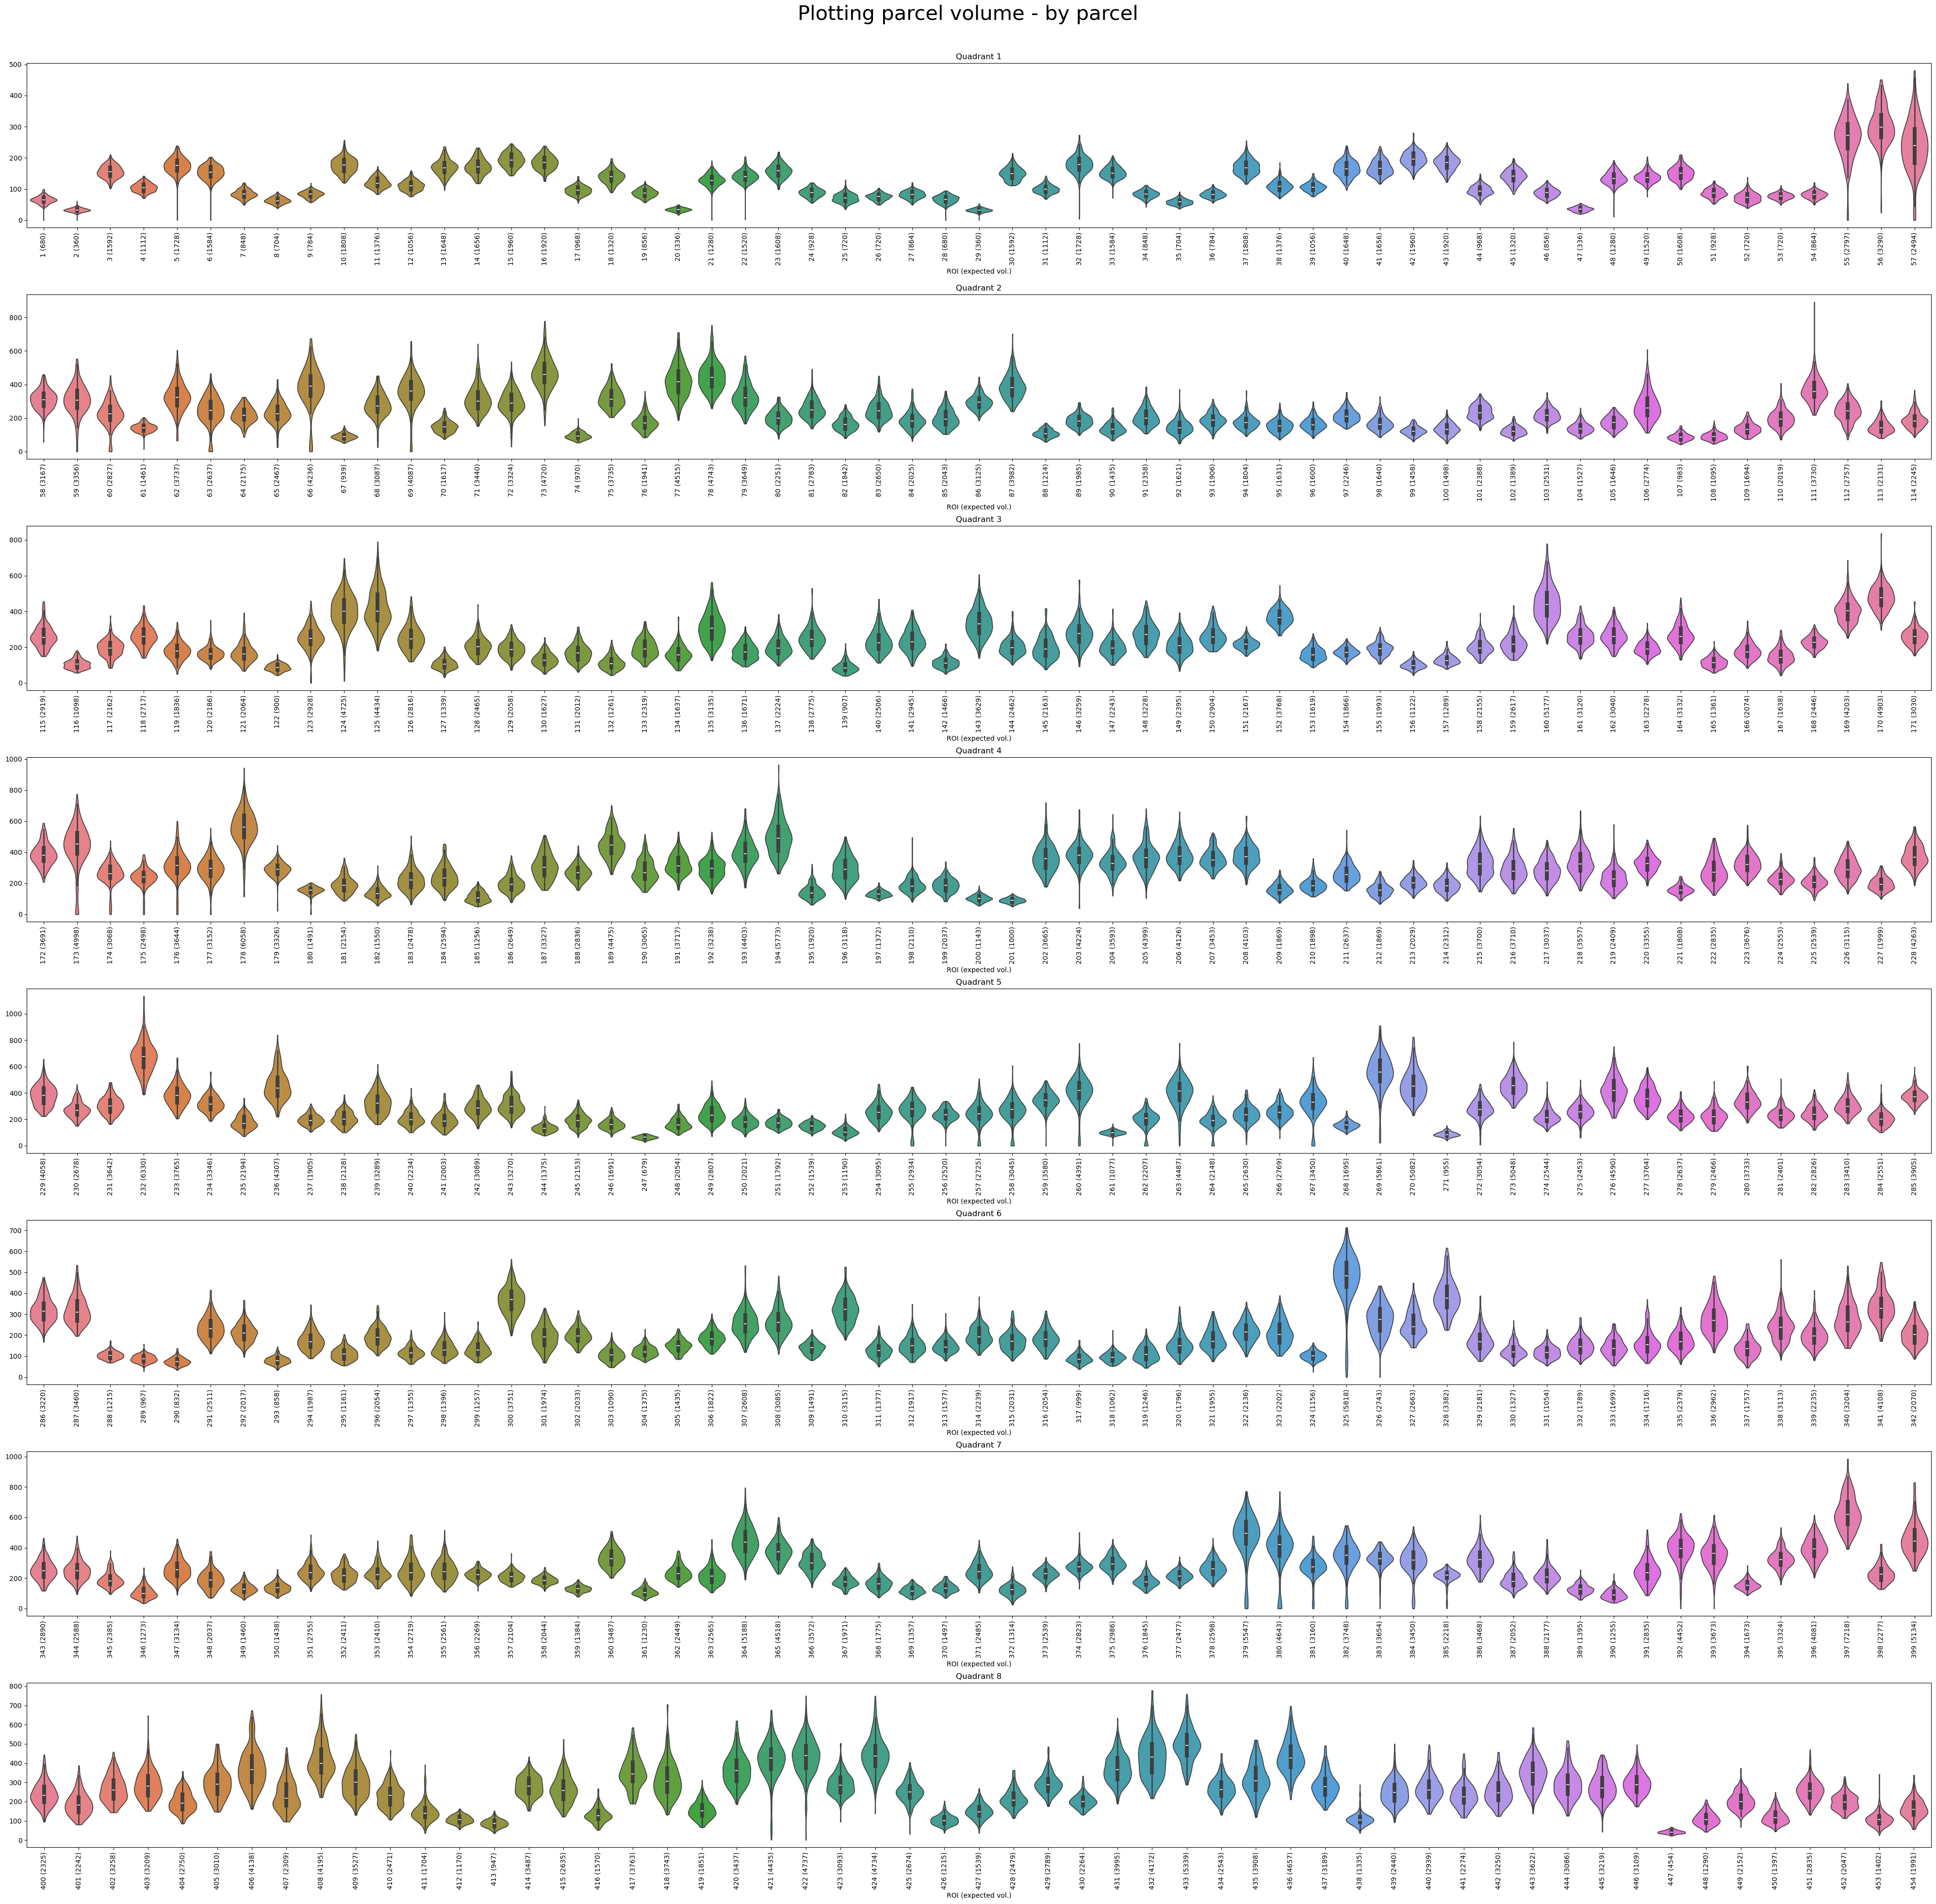

In [66]:
# Determine the number of subjects and calculate the number of subplots needed
num_parcels = len(parcel_vols.columns)
num_subplots = 8
subplots_per_quadrant = num_parcels // num_subplots

# Calculate the number of subjects in the last quadrant
parcels_remaining = num_parcels % num_subplots

# Create subplots for each quadrant
fig, axs = plt.subplots(num_subplots, 1, figsize=(40, 40))

# Plot each quadrant
for i in range(num_subplots - 1):
    start_index = i * (subplots_per_quadrant + 1)
    end_index = (i + 1) * (subplots_per_quadrant + 1)
    subset_vols = parcel_vols.iloc[:, start_index:end_index]
    ax = sns.violinplot(data=subset_vols, ax=axs[i], cut=0)  # Set cut=0 to align with y=0
    ax.set_title(f'Quadrant {i+1}')

    # Add custom x-axis labels
    x_labels = [f'{col} ({roi_labels[int(col)-1]})' for col in subset_vols.columns]
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=90)
    ax.set_xlabel('ROI (expected vol.)')

# Plot the remaining subjects in the last subplot
start_index = (num_subplots - 1) * (subplots_per_quadrant + 1)
subset_vols = parcel_vols.iloc[:, start_index:num_parcels]
ax = sns.violinplot(data=subset_vols, ax=axs[num_subplots - 1], cut=0)  # Set cut=0 to align with y=0
ax.set_title(f'Quadrant {num_subplots}')

# Add custom x-axis labels for the last subplot
x_labels = [f'{col} ({roi_labels[int(col)-1]})' for col in subset_vols.columns]
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=90)
ax.set_xlabel('ROI (expected vol.)')

fig.suptitle("Plotting parcel volume - by parcel", size=30)

fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()


# Divide by disorder

In [57]:
# Load data
vols = pd.read_csv("/Users/gabrieledele/Desktop/GitHub/thesis-work/concat_vols_.tsv", sep='\t')

# Define the patterns to group by and their respective labels
patterns_and_labels = {
    'sub-1*': 'CTRL',
    'sub-5*': 'SCZ',
    'sub-6*': 'BPLR',
    'sub-7*': 'ADHD'
}

patterns = list(patterns_and_labels.keys())

# Exclude the first column
df_excluded = vols.iloc[:, 1:]

# Create a function to match patterns
def match_pattern(col, patterns):
    for pattern in patterns:
        if re.match(pattern.replace('*', '.*'), col):
            return pattern
    return None

# Group columns based on patterns
grouped_columns = {}
for pattern in patterns:
    label = patterns_and_labels[pattern]
    grouped_columns[label] = [col for col in df_excluded.columns if match_pattern(col, [pattern])]

# Create and assign separate DataFrames
CTRL = df_excluded[grouped_columns['CTRL']]
SCZ = df_excluded[grouped_columns['SCZ']]
BPLR = df_excluded[grouped_columns['BPLR']]
ADHD = df_excluded[grouped_columns['ADHD']]

# Display the separate DataFrames
print("CTRL DataFrame:")
print(CTRL)

print("\nSCZ DataFrame:")
print(SCZ)

print("\nBPLR DataFrame:")
print(BPLR)

print("\nADHD DataFrame:")
print(ADHD)


CTRL DataFrame:
     sub-11108  sub-10877  sub-10171  sub-11156  sub-10235  sub-10912  \
0           68         66         65         59         68         49   
1           33         29         27         26         38         24   
2          147        149        128        173        179        149   
3           89         81         95        115        116         92   
4          169        198        150        189        147        145   
..         ...        ...        ...        ...        ...        ...   
449        120        126        184        126        176        151   
450        214        253        299        195        318        182   
451        184        142        222        154        166        169   
452        109        148        104         79        118         83   
453        105        238        194        127        139        162   

     sub-10785  sub-10958  sub-10678  sub-10329  ...  sub-10228  sub-11122  \
0           62         56    

In [ ]:
# Load data
vols = CTRL
vols = vols.T
vols.columns = vols.iloc[0]
#vols = vols.iloc[1:]  # Remove the first row bc it's repetition of parcels

# Load ROI labels
with open('/Users/gabrieledele/combined.txt') as f:
    roi_labels = [line.split()[0] for line in f]

IndexError: list index out of range

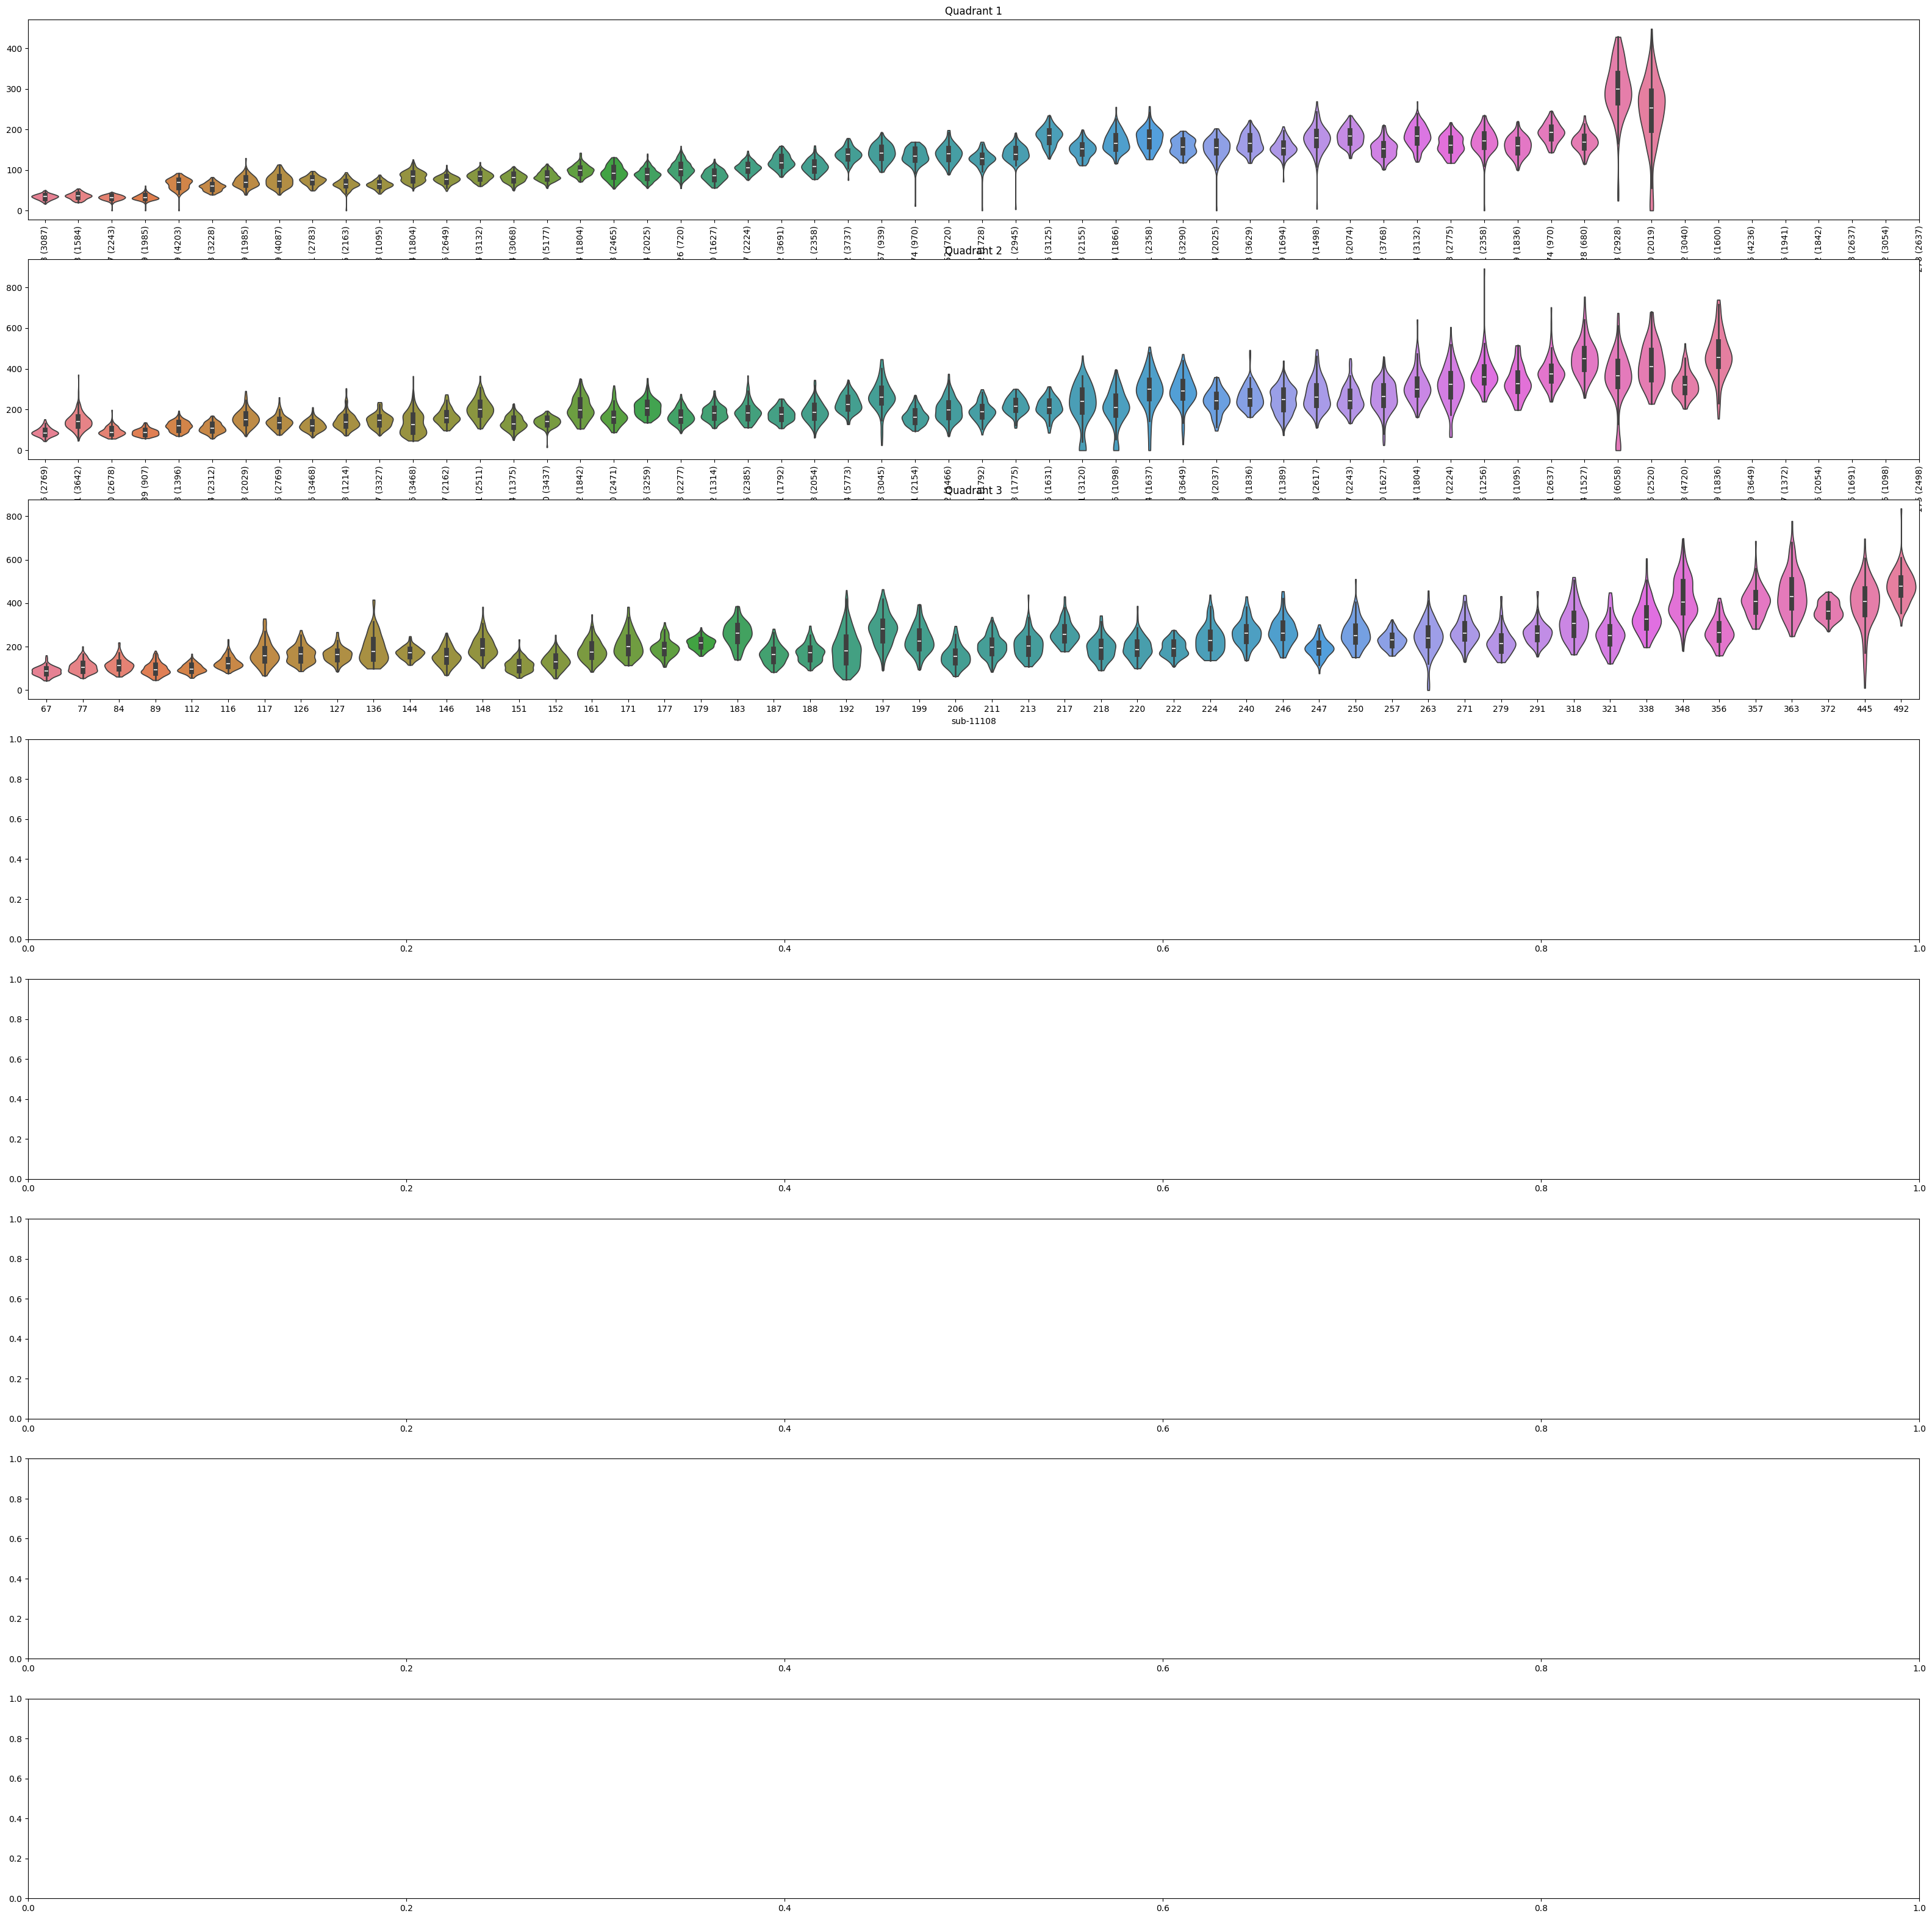

In [71]:
# Determine the number of subjects and calculate the number of subplots needed
num_parcels = len(vols.columns)
num_subplots = 8
subplots_per_quadrant = num_parcels // num_subplots

# Calculate the number of subjects in the last quadrant
parcels_remaining = num_parcels % num_subplots

# Create subplots for each quadrant
fig, axs = plt.subplots(num_subplots, 1, figsize=(40, 40))

# Plot each quadrant
for i in range(num_subplots - 1):
    start_index = i * (subplots_per_quadrant + 1)
    end_index = (i + 1) * (subplots_per_quadrant + 1)
    subset_vols = vols.iloc[:, start_index:end_index]
    ax = sns.violinplot(data=subset_vols, ax=axs[i], cut=0)  # Set cut=0 to align with y=0
    ax.set_title(f'Quadrant {i+1}')

    # Add custom x-axis labels
    x_labels = [f'{col} ({roi_labels[int(col)-1]})' for col in subset_vols.columns]
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=90)
    ax.set_xlabel('ROI (expected vol.)')

# Plot the remaining subjects in the last subplot
start_index = (num_subplots - 1) * (subplots_per_quadrant + 1)
subset_vols = vols.iloc[:, start_index:num_parcels]
ax = sns.violinplot(data=subset_vols, ax=axs[num_subplots - 1], cut=0)  # Set cut=0 to align with y=0
ax.set_title(f'Quadrant {num_subplots}')

# Add custom x-axis labels for the last subplot
x_labels = [f'{col} ({roi_labels[int(col)-1]})' for col in subset_vols.columns]
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=90)
ax.set_xlabel('ROI (expected vol.)')

fig.suptitle("Plotting parcel volume - by parcel", size=30)

fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()


In [72]:
vols

sub-11108  68   33   147  89   169  148  89   69   81   145  ...  186  231  \
sub-11108   68   33  147   89  169  148   89   69   81  145  ...  186  231   
sub-10877   66   29  149   81  198  188  101   64   94  134  ...  268  348   
sub-10171   65   27  128   95  150  134   73   65   73  200  ...  209  328   
sub-11156   59   26  173  115  189  181   88   61   99  181  ...  247  304   
sub-10235   68   38  179  116  147  156   76   78   96  186  ...  222  369   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
sub-10746   67   35  173  109  184  148  107   65   80  204  ...  244  256   
sub-10274   46   32  168  117  164  136   86   49   81  216  ...  307  253   
sub-11030   82   41  146   92  198  196  100   66   77  201  ...  289  214   
sub-10940   74   34  153  127  176  200   93   52   77  257  ...  365  331   
sub-10448   57   30  142   93  144  112   65   56   72  164  ...  201  230   

sub-11108  25   127  185  120  214  184  109  105  
sub-11108   25  127  185  120  214  184  109  105  
sub-10877   68  120  217  126  253  142  148  238  
sub-10171   45  126  259  184  299  222  104  194  
sub-11156   35  114  174  126  195  154   79  127  
sub-10235   48  119  279  176  318  166  118  139  
...        ...  ...  ...  ...  ...  ...  ...  ...  
sub-10746   39   79  214  119  266  243  149  175  
sub-10274   23   95  157  125  162  162   82  124  
sub-11030   40  103  152   98  273  226  111  193  
sub-10940   46  148  194  108  233  250  112  179  
sub-10448   48   83  198  132  308  240  132  196  

[101 rows x 454 columns]